In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import plotext as plt
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
import kaleido
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

#px.renderers.default = "notebook"

In [2]:
# read in Excel files
df1 = pd.read_excel(r'C:\Users\peter\OneDrive\Desktop\Clark\Fall 2023\online_retail_qty.xlsx', sheet_name = 'Year 2009-2010')
df2 = pd.read_excel(r'C:\Users\peter\OneDrive\Desktop\Clark\Fall 2023\online_retail_qty.xlsx', sheet_name = 'Year 2010-2011')
df3 = pd.read_excel(r'C:\Users\peter\OneDrive\Desktop\Clark\Fall 2023\online_retail_price.xlsx', sheet_name = 'Year 2009-2010')
df4 = pd.read_excel(r'C:\Users\peter\OneDrive\Desktop\Clark\Fall 2023\online_retail_price.xlsx', sheet_name = 'Year 2010-2011')


In [3]:
# append df1 and df2 then df3 and df4
df10 = df1.append(df2, ignore_index = True)
df11 = df3.append(df4, ignore_index = True)

# join df10 and df11
df20 = pd.merge(df10, df11, how = 'inner')

# calculate the total column
## calculate the total in new data frame then append to original dataframe 
results_list = []
for i, row in df20.iterrows():
    total = row['Quantity'] * row['Price']
    results_list.append(total)

df20[total] = results_list

df20.rename(columns = {df20.columns[8]: 'Total'}, inplace = True)
print(df20.columns)
print(df20)
print(df20['Quantity'].info())
print(df20['Price'].info())
print(df20['Total'].info())
print(df20['Quantity'].describe())
print(df20['Price'].describe())
print(df20['Total'].describe())


C:\Users\peter\AppData\Local\Temp\ipykernel_10948\591691328.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df10 = df1.append(df2, ignore_index = True)
C:\Users\peter\AppData\Local\Temp\ipykernel_10948\591691328.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df3.append(df4, ignore_index = True)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Customer ID', 'Country', 'Price', 'Total'],
      dtype='object')
        Invoice StockCode  ... Price  Total
0        489434     85048  ...  6.95   83.4
1        489434    79323P  ...  6.75   81.0
2        489434    79323W  ...  6.75   81.0
3        489434     22041  ...  2.10  100.8
4        489434     21232  ...  1.25   30.0
...         ...       ...  ...   ...    ...
1169376     NaN       NaN  ...  0.00    0.0
1169377     NaN       NaN  ...  0.00    0.0
1169378     NaN       NaN  ...  0.00    0.0
1169379     NaN       NaN  ...  0.00    0.0
1169380     NaN       NaN  ...  0.00    0.0

[1169381 rows x 9 columns]
<class 'pandas.core.series.Series'>
Int64Index: 1169381 entries, 0 to 1169380
Series name: Quantity
Non-Null Count    Dtype
--------------    -----
1169381 non-null  int64
dtypes: int64(1)
memory usage: 17.8 MB
None
<class 'pandas.core.series.Series'>
Int64Index: 1169381 entries, 0 to 1169380
Ser

[]

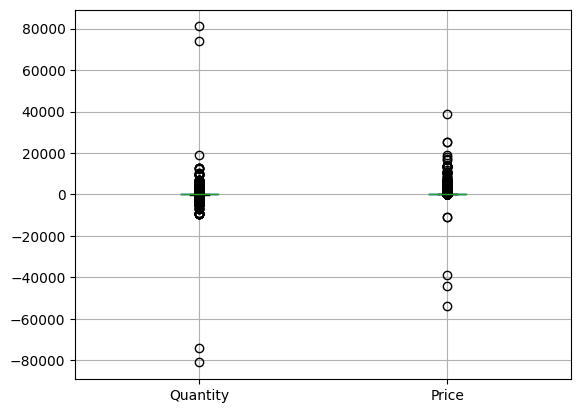

In [97]:
# box-whisker plot for quantity and price
box_plot = df20.boxplot(column = ['Quantity', 'Price'])
box_plot.plot()

Text(0.5, 1.0, 'Daily Quantity 2009 to 2011')

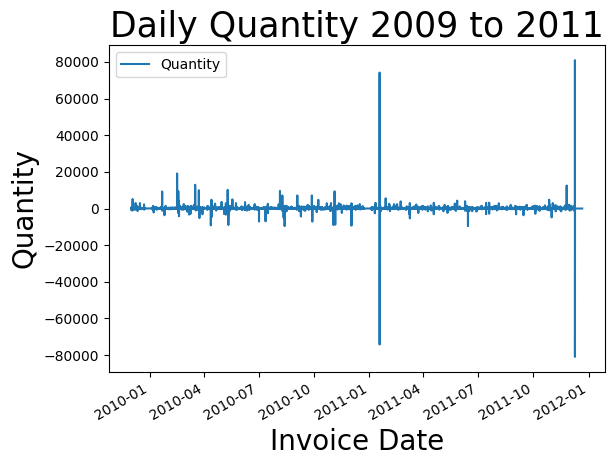

In [98]:
# time series line chart for quantity, price, and total
%matplotlib inline
df20.plot(x = "InvoiceDate", y = "Quantity")
plot.xlabel("Invoice Date", size = 20)
plot.ylabel("Quantity", size = 20)
plot.title("Daily Quantity 2009 to 2011", size = 25)
#plt.show()


Text(0.5, 1.0, 'Daily Price 2009 to 2011')

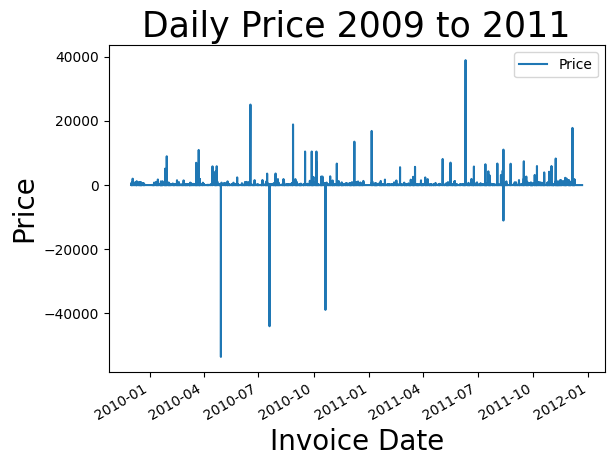

In [99]:

%matplotlib inline
df20.plot(x = "InvoiceDate", y = "Price")
plot.xlabel("Invoice Date", size = 20)
plot.ylabel("Price", size = 20)
plot.title("Daily Price 2009 to 2011", size = 25)
#plt.show()



Text(0.5, 1.0, 'Daily Total Sales 2009 to 2011')

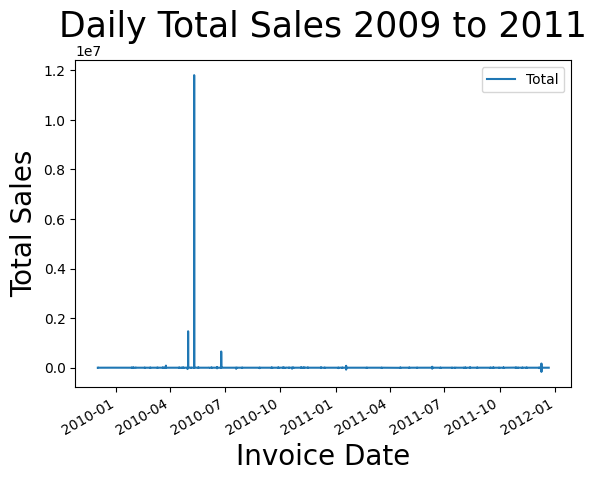

In [100]:

%matplotlib inline
df20.plot(x = "InvoiceDate", y = "Total")
plot.xlabel("Invoice Date", size = 20)
plot.ylabel("Total Sales", size = 20)
plot.title("Daily Total Sales 2009 to 2011", size = 25)
#plt.show(block = True)


In [4]:
# convert timestamp to date
df20['Date'] = pd.to_datetime(df20["InvoiceDate"]).dt.date
print(df20)

        Invoice StockCode  ...  Total        Date
0        489434     85048  ...   83.4  2009-12-01
1        489434    79323P  ...   81.0  2009-12-01
2        489434    79323W  ...   81.0  2009-12-01
3        489434     22041  ...  100.8  2009-12-01
4        489434     21232  ...   30.0  2009-12-01
...         ...       ...  ...    ...         ...
1169376     NaN       NaN  ...    0.0  2011-12-17
1169377     NaN       NaN  ...    0.0  2011-12-18
1169378     NaN       NaN  ...    0.0  2011-12-19
1169379     NaN       NaN  ...    0.0  2011-12-20
1169380     NaN       NaN  ...    0.0  2011-12-21

[1169381 rows x 10 columns]


In [5]:
# sum total by new column date
df30 = df20[["Date", "Total"]].copy()
print(df30.columns)
print(df30) 
df31 = df30.groupby(by = 'Date', sort = False, as_index = False)['Total'].sum()
print(df31.columns)
print(df31)
print(df31.info())
print(df31.describe())

Index(['Date', 'Total'], dtype='object')
               Date  Total
0        2009-12-01   83.4
1        2009-12-01   81.0
2        2009-12-01   81.0
3        2009-12-01  100.8
4        2009-12-01   30.0
...             ...    ...
1169376  2011-12-17    0.0
1169377  2011-12-18    0.0
1169378  2011-12-19    0.0
1169379  2011-12-20    0.0
1169380  2011-12-21    0.0

[1169381 rows x 2 columns]
Index(['Date', 'Total'], dtype='object')
           Date     Total
0    2009-12-01  53958.11
1    2009-12-02  63674.18
2    2009-12-03  64903.99
3    2009-12-04  41325.38
4    2009-12-05   9803.05
..          ...       ...
611  2011-12-17      0.00
612  2011-12-18      0.00
613  2011-12-19      0.00
614  2011-12-20      0.00
615  2011-12-21      0.00

[616 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    616 non-null    object 
 1   Total   61

┌──────────────────────────────────────────────────────────────────────────────┐
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                                                                              │
│                           

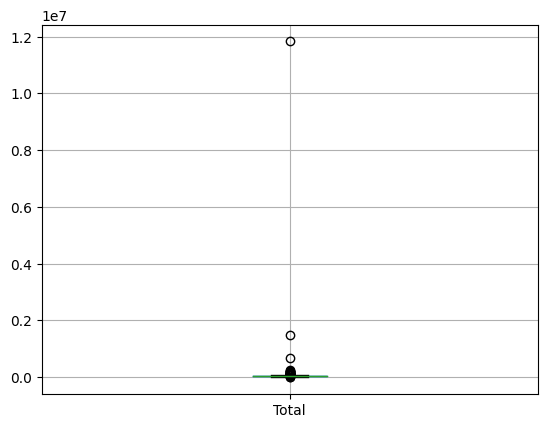

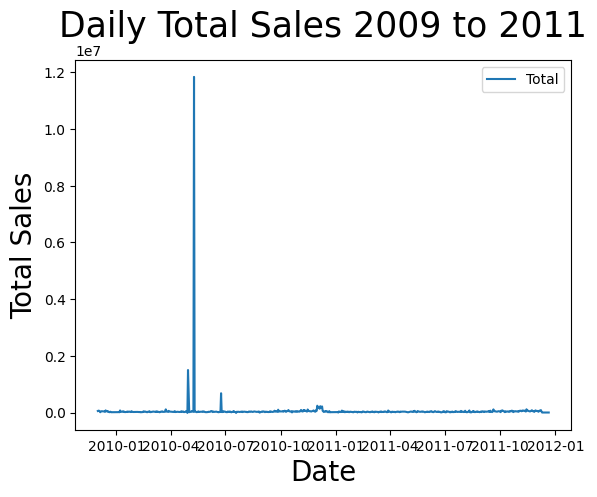

In [103]:
# chart the final data frame
## box and whisker plot
%matplotlib inline
box_plot10 = df31.boxplot(column = ['Total'])
box_plot10.plot()


## line plot
%matplotlib inline
df31.plot(x = "Date", y = "Total")
plot.xlabel("Date", size = 20)
plot.ylabel("Total Sales", size = 20)
plot.title("Daily Total Sales 2009 to 2011", size = 25)
plt.show()
#plt.show(block = True)

p-value: 0.0


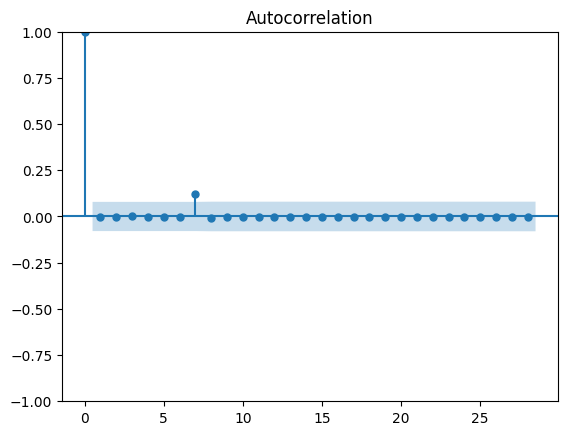

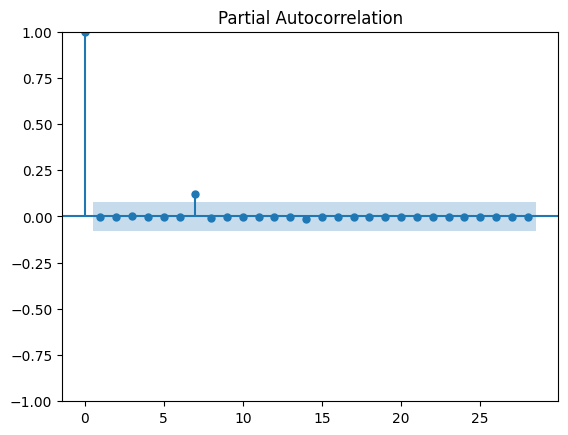

In [122]:
# check acf, pacf, adf
acf_original = plot_acf(df31['Total'])
pacf_original = plot_pacf(df31['Total'])

adf_test = adfuller(df31['Total'])
print(f'p-value: {adf_test[1]}')

In [105]:
# find the best model
## use ARIMA with no seasonality based on 12 months
arimamodel1 = auto_arima(df31['Total'], max_p = 3, max_q = 3, d = 3, seasonal = False, trace = True, stepwise = False, m = 12)
arimamodel1.summary()

## use ARIMA with seasonality based on 12 months
arimamodel2 = auto_arima(df31['Total'], max_p = 3, max_q = 3, d = 3, seasonal = True, trace = True, stepwise = False, m = 12)
arimamodel2.summary()

c:\Users\peter\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



 ARIMA(0,3,0)(0,0,0)[0]             : AIC=19620.659, Time=0.03 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=18145.770, Time=0.62 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=19116.200, Time=0.04 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=inf, Time=1.25 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=18843.003, Time=0.17 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=inf, Time=1.58 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=18667.976, Time=0.05 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=1.27 sec

Best model:  ARIMA(0,3,3)(0,0,0)[0]          
Total fi

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  616
Model:             SARIMAX(1, 3, 3)x(0, 0, [1], 12)   Log Likelihood               -9048.828
Date:                              Wed, 13 Sep 2023   AIC                          18109.656
Time:                                      17:12:51   BIC                          18136.166
Sample:                                           0   HQIC                         18119.966
                                              - 616                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0146      0.079     -0.184      0.854      -0.170       0.141
ma.L1         -2.9277      0.048    -61.335      0.000      -3.021      -2.834
ma.L2          2.8575      0.098     29.096      0.000       2.665       3.050
ma.L3         -0.9297      0.051    -18.281      0.000      -1.029      -0.830
ma.S.L12      -0.0065      0.118     -0.055      0.956      -0.237       0.224
sigma2      7.322e+11   3.48e-13   2.11e+24      0.000    7.32e+11    7.32e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           6485444.64
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            21.34
Prob(H) (two-sided):                  0.00   Kurtosis:                       505.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+40. Standard errors may be unstable.
"""

Index(['Date', 'Total', 'Forecast1'], dtype='object')


c:\Users\peter\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  593
Model:                 ARIMA(0, 3, 3)   Log Likelihood               -8740.564
Date:                Thu, 14 Sep 2023   AIC                          17489.128
Time:                        08:43:13   BIC                          17506.648
Sample:                             0   HQIC                         17495.953
                                - 593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.9239      0.046    -63.576      0.000      -3.014      -2.834
ma.L2          2.8506      0.094     30.306      0.000       2.666       3.035
ma.L3         -0.9267      0.049    -19.088      0.0

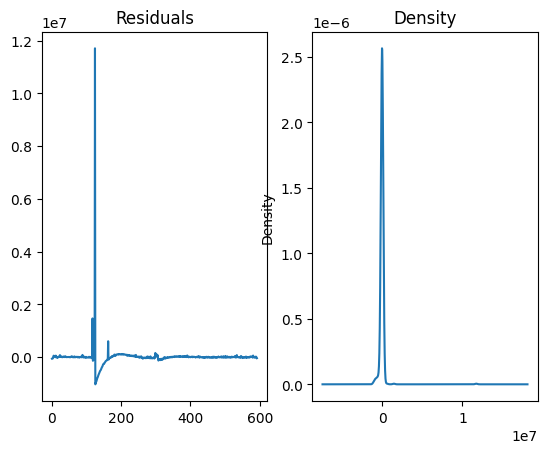

MAPE:  31.40510647823888 %
Forecast Accuracy:  68.59489352176112 %


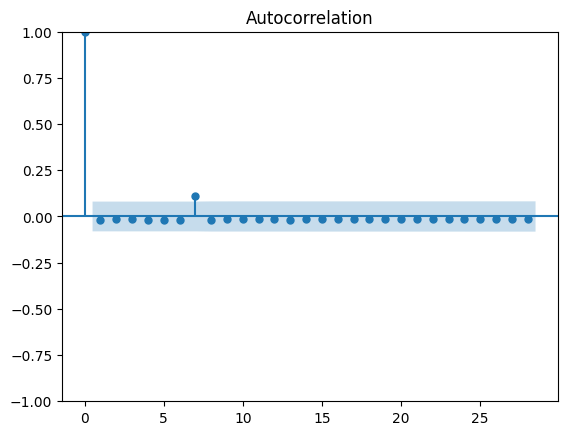

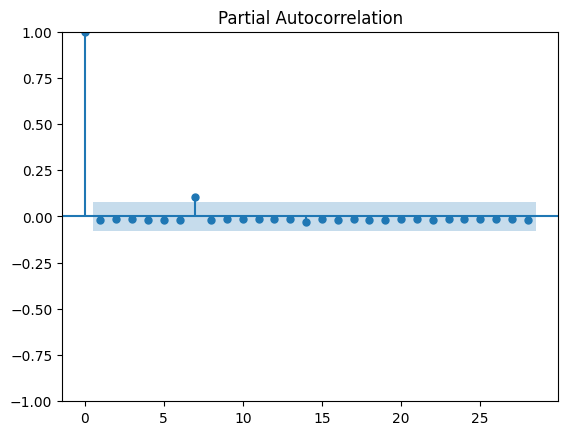

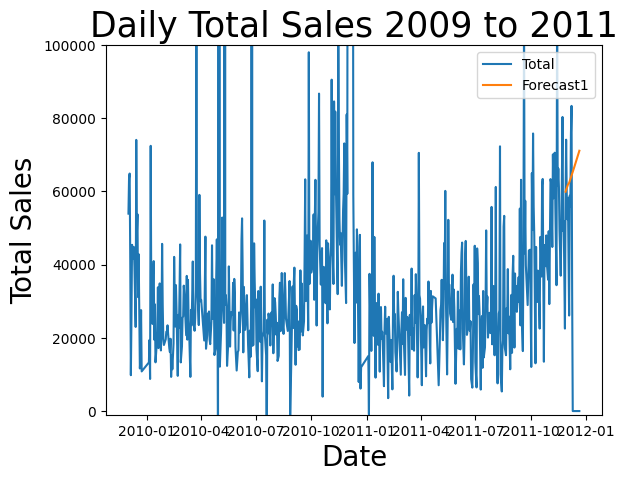

In [124]:
# take the results from best model to enter parameters into ARIMA non-seasonal

## create training data set
revenue_train = df31[:593]
revenue_test = df31[593:604]
print(df31.columns)
#print(revenue_train)

## make ARIMA model (0, 3, 3)
model1 = ARIMA(revenue_train['Total'], order = (0, 3, 3))
model1_fit = model1.fit()
print(model1_fit.summary())

## predicted on historical data
#output1 = model1_fit.forecast()
#yhat = output1[0:]
#print(output1)

forecast1 = model1_fit.forecast(23)
print(forecast1)

## add rows to df31 then add the forecast to dataframe
#df31 = pd.DataFrame (
#    {
#        "Date": [2011-12-10, 2011-12-11, 2011-12-12, 2011-12-13, 2011-12-14, 2011-12-15, 2011-12-16, 2011-12-17, 2011-12-18, 2011-12-19, 2011-12-20, 2011-12-21]
#    }
#   ) 
print(df31.tail())
df31['Forecast1'] = [None]*len(revenue_train) + list(forecast1)

## plot the residuals
%matplotlib inline
residuals = model1_fit.resid[1:]
fig, ax = plot.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plot.show()

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

## evaluate model performance using MAPE
mape = np.mean(np.abs(forecast1 - revenue_test['Total']) / np.abs(revenue_test['Total'])) * 100
forecast_accuracy = 100 - mape
print('MAPE: ', mape, '%')
print('Forecast Accuracy: ', forecast_accuracy, '%')

## line plot for predictions
%matplotlib inline
df31.plot(x = "Date", y = ["Total", "Forecast1"])
plot.xlabel("Date", size = 20)
plot.ylim(-1000, 100000)
plot.ylabel("Total Sales", size = 20)
plot.title("Daily Total Sales 2009 to 2011", size = 25)
plot.show()

fig = px.line(df31, x = 'Date', y = ['Total', 'Forecast1'], markers = True)
#fig.show()

c:\Users\peter\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                  593
Model:             ARIMA(0, 3, 3)x(1, 0, [], 12)   Log Likelihood               -8740.662
Date:                           Thu, 14 Sep 2023   AIC                          17491.324
Time:                                   10:04:21   BIC                          17513.224
Sample:                                        0   HQIC                         17499.856
                                           - 593                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.9301      0.048    -61.665      0.000      -3.023      -2.837
ma.L2          2.8631      0.097     29.545

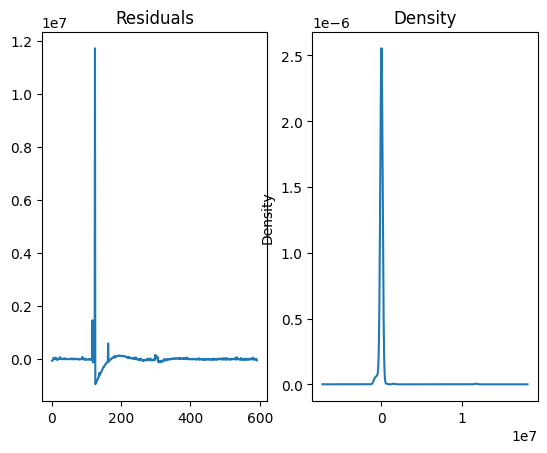

MAPE:  31.40510647823888 %
Forecast Accuracy:  68.59489352176112 %


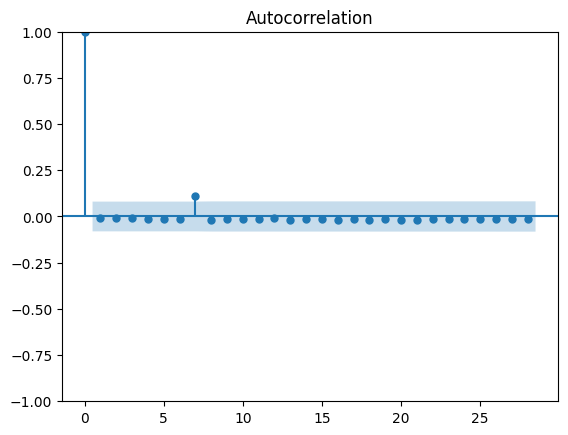

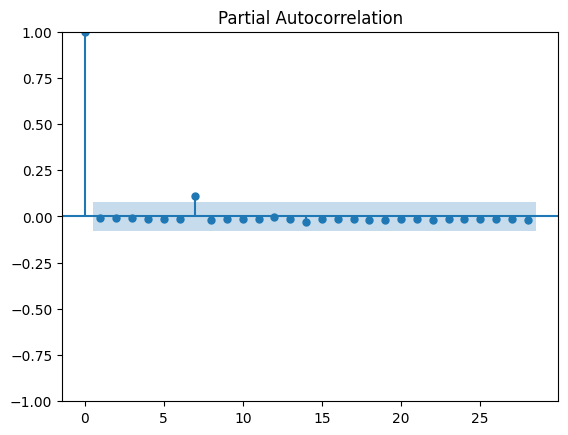

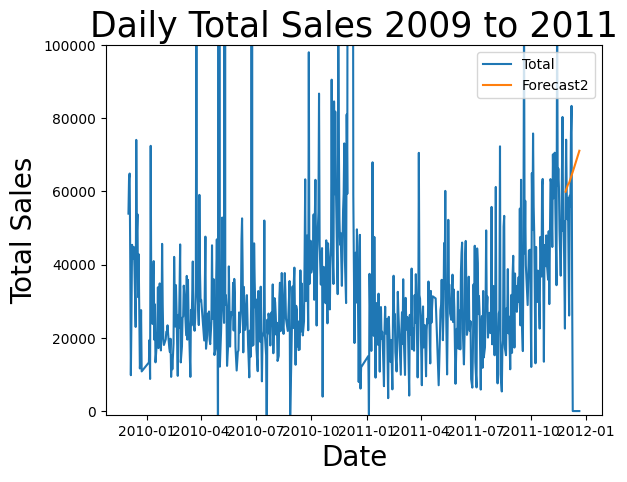

In [126]:
# take the results from best model to enter parameters into ARIMA seasonal

## create training data set
#revenue_train = df31[:592]
#revenue_test = df31[592:604]

## make ARIMA model (0, 3, 3)
model2 = ARIMA(revenue_train['Total'], order = (0, 3, 3), seasonal_order = (1, 0, 0, 12))
model2_fit = model2.fit()
print(model2_fit.summary())

## predicted on historical data
#output1 = model1_fit.forecast()
#yhat = output1[0:]
#print(output1)

forecast2 = model1_fit.forecast(23)
print(forecast2)

## add rows to df31 then add the forecast to dataframe
#df31 = pd.DataFrame (
#    {
#        "Date": [2011-12-10, 2011-12-11, 2011-12-12, 2011-12-13, 2011-12-14, 2011-12-15, 2011-12-16, 2011-12-17, 2011-12-18, 2011-12-19, 2011-12-20, 2011-12-21]
#    }
#   ) 
print(df31.tail())
df31['Forecast2'] = [None]*len(revenue_train) + list(forecast2)

## plot the residuals
%matplotlib inline
residuals = model2_fit.resid[1:]
fig, ax = plot.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde', ax = ax[1])
plot.show()

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

## evaluate model performance using MAPE
mape2 = np.mean(np.abs(forecast2 - revenue_test['Total']) / np.abs(revenue_test['Total'])) * 100
forecast_accuracy2 = 100 - mape2
print('MAPE: ', mape2, '%')
print('Forecast Accuracy: ', forecast_accuracy2, '%')

## line plot for predictions
%matplotlib inline
df31.plot(x = "Date", y = ["Total", "Forecast2"])
plot.xlabel("Date", size = 20)
plot.ylim(-1000, 100000)
plot.ylabel("Total Sales", size = 20)
plot.title("Daily Total Sales 2009 to 2011", size = 25)
plot.show()

fig = px.line(df31, x = 'Date', y = ['Total', 'Forecast2'], markers = True)
#fig.show()


In [8]:
# create a new dataframe called ts with date and sales data only
df31['Date'] = pd.to_datetime(df31['Date'])
df40 = df31
df40.columns = ['ds', 'y']
df40 = df40.dropna()
df40.head()


#ts = ts.dropna()

KeyError: 'Date'

08:50:14 - cmdstanpy - INFO - Chain [1] start processing
08:50:14 - cmdstanpy - INFO - Chain [1] done processing


OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

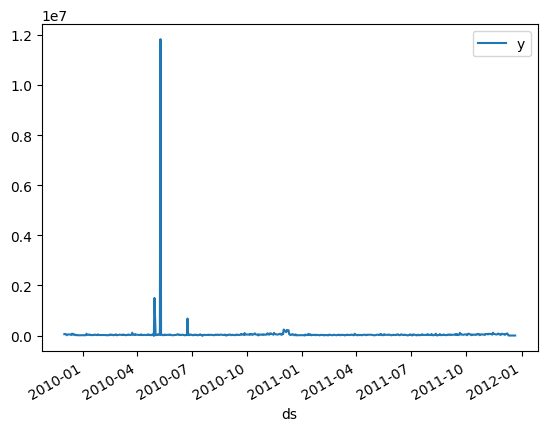

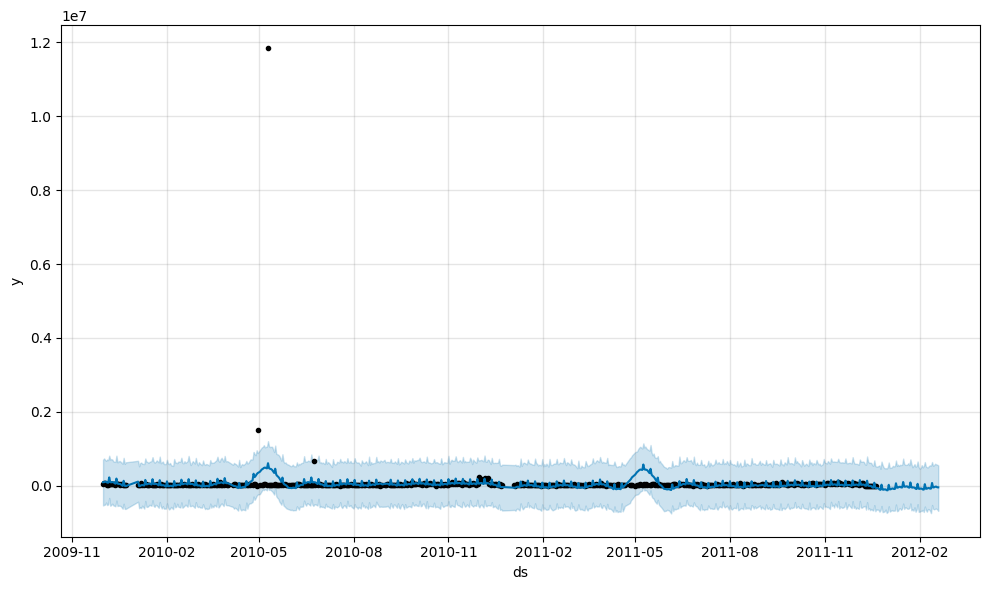

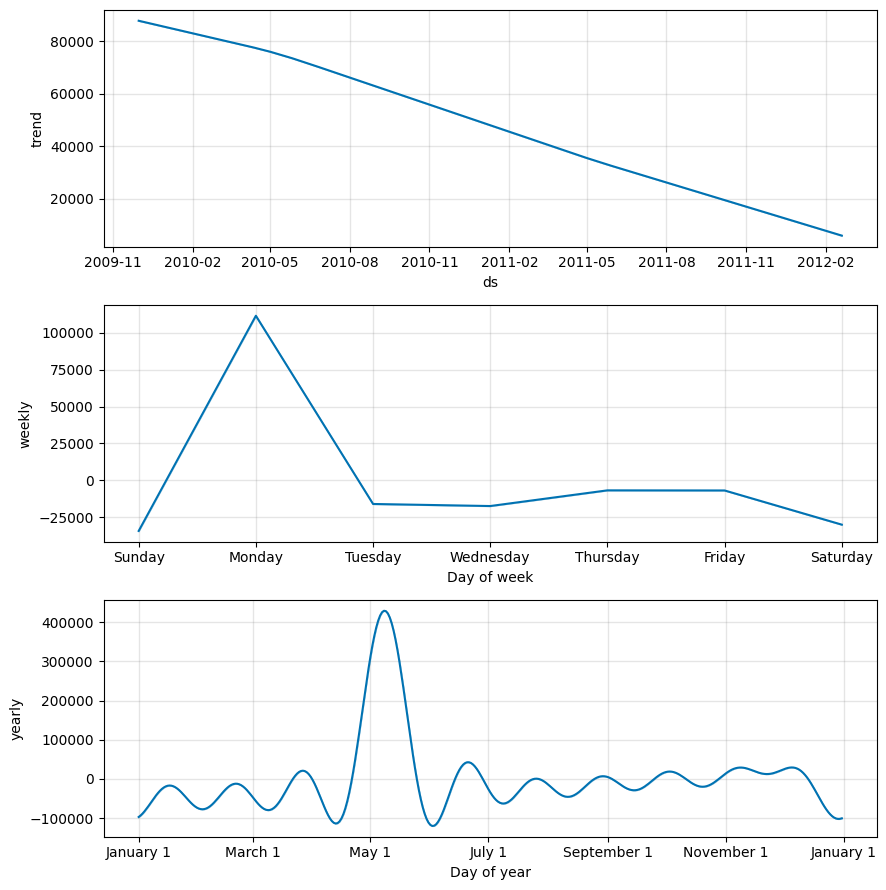

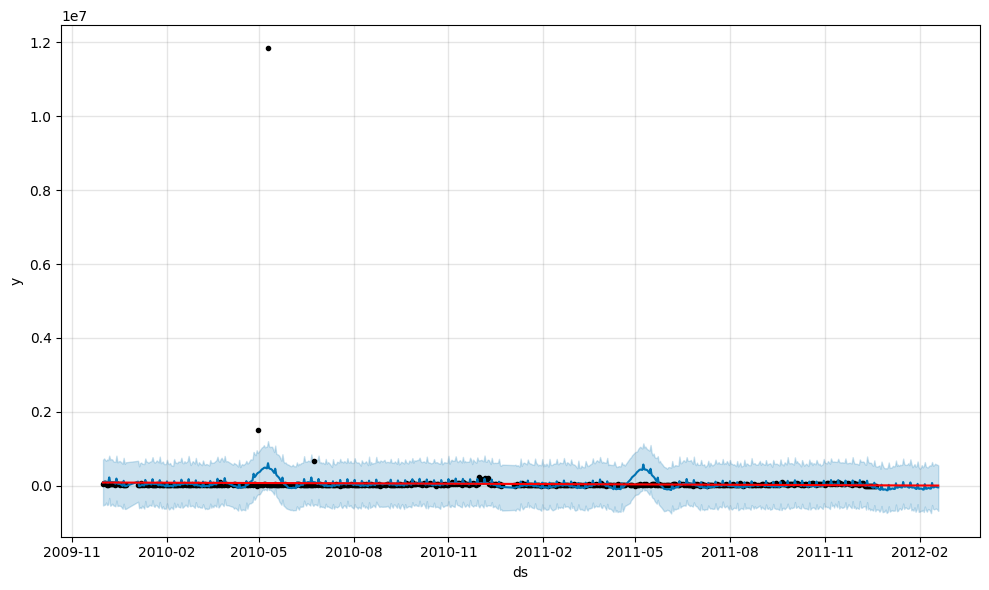

In [27]:
# basic Prophet code just to get something running

df40.set_index('ds').plot()
model3 = Prophet().fit(df40)
future = model3.make_future_dataframe(60)
forecast3 = model3.predict(future)
forecast3.head()

#plot.ylim(-1000, 10000)
model3.plot(forecast3);
model3.plot_components(forecast3);
fig = model3.plot(forecast3)
add_changepoints_to_plot(fig.gca(), model3, forecast3)
model3.changepoints
model3.seasonalities


18:50:06 - cmdstanpy - INFO - Chain [1] start processing
18:50:06 - cmdstanpy - INFO - Chain [1] done processing


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Boxing Day', 'Boxing Day_lower', 'Boxing Day_upper',
       'Boxing Day (Observed)', 'Boxing Day (Observed)_lower',
       'Boxing Day (Observed)_upper', 'Christmas Day', 'Christmas Day_lower',
       'Christmas Day_upper', 'Christmas Day (Observed)',
       'Christmas Day (Observed)_lower', 'Christmas Day (Observed)_upper',
       'Good Friday', 'Good Friday_lower', 'Good Friday_upper', 'May Day',
       'May Day_lower', 'May Day_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Spring Bank Holiday',
       'Spring Bank Holiday_lower', 'Spring Bank Holiday_upper',
       'Wedding of William and Catherine',
       'Wedding of William and Catherine_lower',
       'Wedding of William and Catherine_upper', 'additive_terms',
       'additive_terms_lower', 'addi

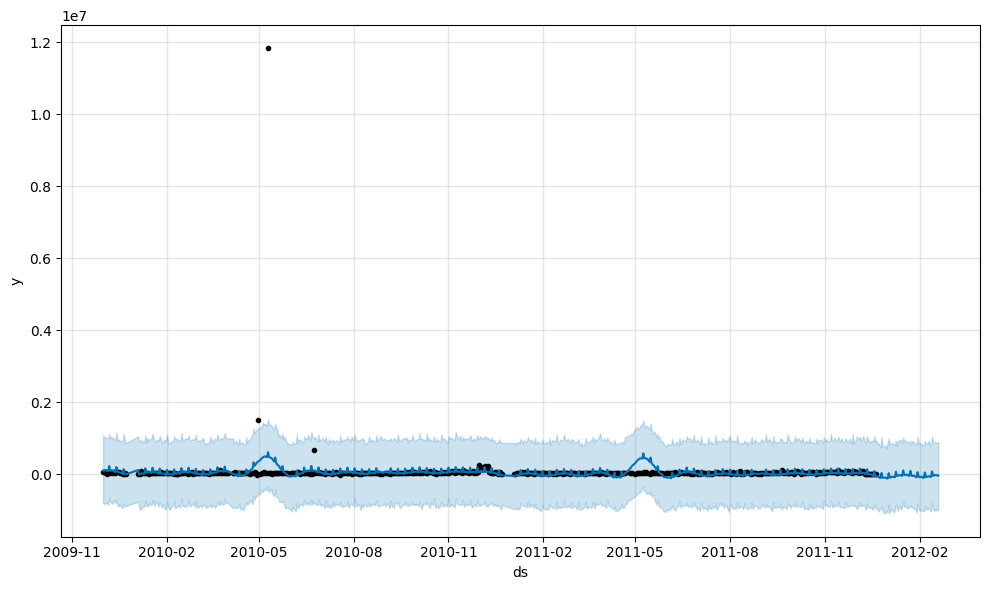

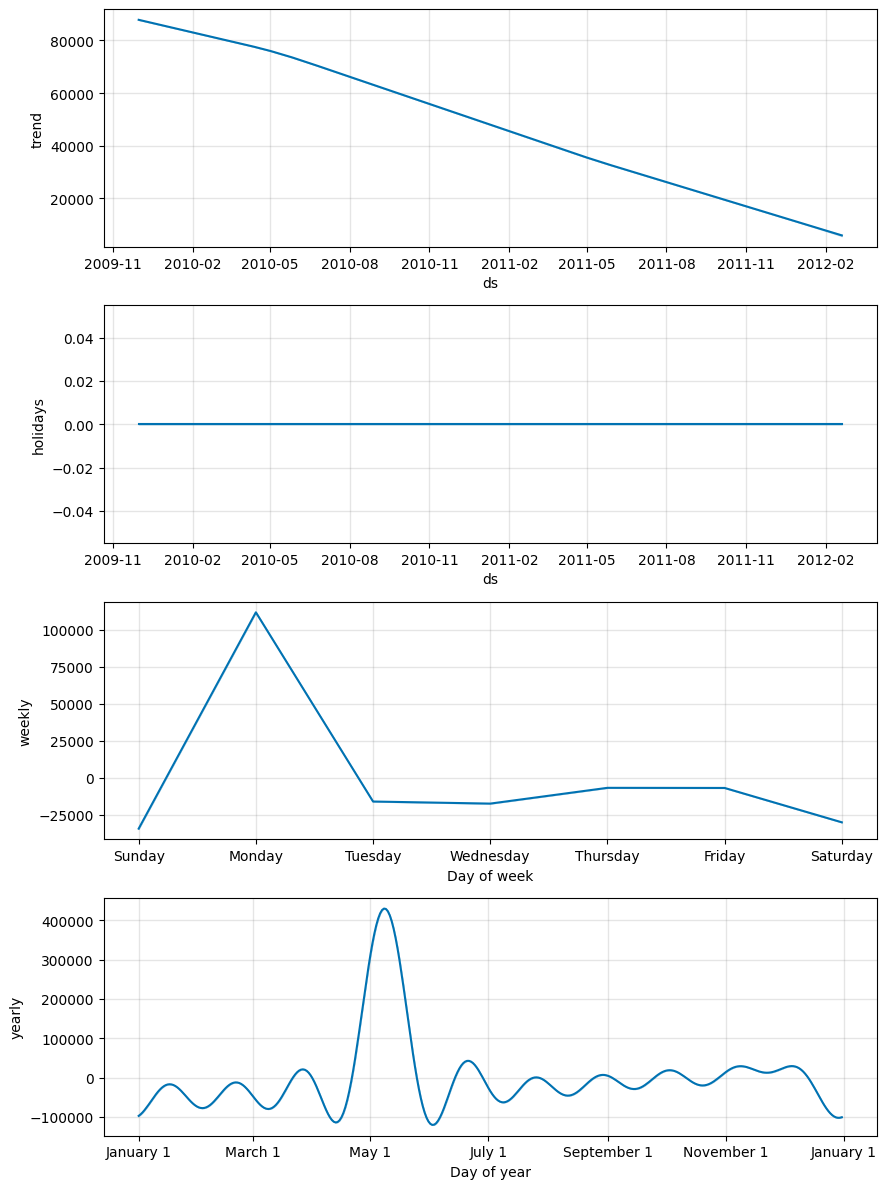

In [23]:
# more Prophet code using more of the functionality
model4 = Prophet(interval_width = 0.95, yearly_seasonality = 'auto', 
                 weekly_seasonality = 'auto', daily_seasonality = 'auto')
model4.add_country_holidays(country_name = 'UK')
model4.fit(df40)
future1 = model4.make_future_dataframe(periods = 60, freq = 'D')
forecast4 = model4.predict(future1)
plot_forecast4 = model4.plot(forecast4)
plot_components4 = model4.plot_components(forecast4)

print(forecast4.columns)
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
print('MAE: ', mean_absolute_error(forecast4['trend'], forecast4['yhat']))
print('MAPE: ', mean_absolute_percentage_error(forecast4['trend'], forecast4['yhat']))
print('Forecast Accuracy: ', (100 - mean_absolute_percentage_error(forecast4['trend'], forecast4['yhat'])))
print('MSE: ', mean_squared_error(forecast4['trend'], forecast4['yhat']))
print('R^2: ', r2_score(forecast4['trend'], forecast4['yhat']))

